# Terry Traffic Stops Project

In this project, We implore the OSEMN Data Science Process 

# 1. Obtain

We first import all the data and packages needed 

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE  


In [669]:
# Import data
df = pd.read_csv('Terry_stops.csv')
pd.set_option('display.max_columns',None)

The data was sourced from Seattle Police Department 

### Stakeholder Requirement and Problem

Our stakeholder is the Supreme Court of Ohio. This is to help them understand if the Terry V. Ohio case was ruled accordingly and to ensure that such cases presented to them do not violed the Fourth Amendment that states; 

The right of the people to be secure in their persons, houses, papers, and effects, against unreasonable searches and seizures, shall not be violated, and no warrants shall issue, but upon probable cause, supported by oath or affirmation, and particularly describing the place to be searched, and the persons or things to be seized.

The inspiration to conduct this project was stemed from the event that caused Terry and his three friends to face 3 years imprisonment due to unreasonable searches and seizures and above all the need to protect the officer's safety incident to the investigation by the state.

# 2. Scrub

This process involves pre-processing of the data imported

In [670]:
# Look at the data
df.head(10)


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00Z,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00Z,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00Z,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00Z,04:55:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00Z,00:41:00.0000000,-,-,-,NaN,N,N,-,-,-
5,-,-1,20150000001755,33571,Field Contact,None,7402,1973,M,White,Black or African American,Male,2015-04-05T00:00:00Z,23:46:00.0000000,-,-,-,NaN,N,N,-,-,-
6,-,-1,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00Z,21:39:00.0000000,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
7,-,-1,20150000002363,45182,Field Contact,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00Z,22:40:00.0000000,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
8,-,-1,20150000002392,45365,Field Contact,None,7560,1986,M,White,White,Female,2015-05-22T00:00:00Z,07:39:00.0000000,-,-,-,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2
9,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,-,-,2015-05-25T00:00:00Z,01:06:00.0000000,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-


In [671]:
# Look for null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52328 entries, 0 to 52327
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         52328 non-null  object
 1   Subject ID                52328 non-null  int64 
 2   GO / SC Num               52328 non-null  int64 
 3   Terry Stop ID             52328 non-null  int64 
 4   Stop Resolution           52328 non-null  object
 5   Weapon Type               52328 non-null  object
 6   Officer ID                52328 non-null  object
 7   Officer YOB               52328 non-null  int64 
 8   Officer Gender            52328 non-null  object
 9   Officer Race              52328 non-null  object
 10  Subject Perceived Race    52328 non-null  object
 11  Subject Perceived Gender  52328 non-null  object
 12  Reported Date             52328 non-null  object
 13  Reported Time             52328 non-null  object
 14  Initial Call Type     

In [672]:
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               486
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [673]:
# Drop Null values column
df = df.drop('Officer Squad', axis = 1)

In [674]:
# Drop duplicates
df = df.drop_duplicates(subset=['Terry Stop ID'], keep='first')

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52266 entries, 0 to 52327
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         52266 non-null  object
 1   Subject ID                52266 non-null  int64 
 2   GO / SC Num               52266 non-null  int64 
 3   Terry Stop ID             52266 non-null  int64 
 4   Stop Resolution           52266 non-null  object
 5   Weapon Type               52266 non-null  object
 6   Officer ID                52266 non-null  object
 7   Officer YOB               52266 non-null  int64 
 8   Officer Gender            52266 non-null  object
 9   Officer Race              52266 non-null  object
 10  Subject Perceived Race    52266 non-null  object
 11  Subject Perceived Gender  52266 non-null  object
 12  Reported Date             52266 non-null  object
 13  Reported Time             52266 non-null  object
 14  Initial Call Type     

In [676]:
df['Subject Age Group'].unique()

array(['-', '1 - 17', '18 - 25', '26 - 35', '36 - 45', '46 - 55',
       '56 and Above'], dtype=object)

In [677]:
df['Subject Age Group'].value_counts()

26 - 35         17452
36 - 45         11271
18 - 25         10302
46 - 55          6716
56 and Above     2696
1 - 17           2059
-                1770
Name: Subject Age Group, dtype: int64

In [678]:
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

Our target vriable will be the Stop Resolution column. This is becase we aim to see if an arrest was made after a Terry Stop.
This is a binary classification problem 1 = Arrest, 0 = No arrest. We will look at the content in the Stop Resolution Column and assign arrest to 1 and the rest as 0. 

In [679]:
# See unique values in Stop Resolution Column
df['Stop Resolution'].unique()

array(['Arrest', 'Field Contact', 'Citation / Infraction',
       'Offense Report', 'Referred for Prosecution'], dtype=object)

In [680]:
# Assign 1 to arrest and 0 to the rest
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

0    39398
1    12868
Name: Stop Resolution, dtype: int64

We first change the date column to a datetime formart and also separate the month, and year into separate columns to analyse each individually and get insights from them.

In [681]:
# Change the date column to datetime so we can work with it. Add in the month as a new column:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Month'] = df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})

df['Year'] = df['Reported Date'].dt.year

In [682]:
df['Month']

0         October
1           March
2           March
3           April
4           April
           ...   
52323    November
52324        June
52325        July
52326        July
52327        July
Name: Month, Length: 52266, dtype: object

Drop all the columns that are uncessary and will not be used

In [683]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Arrest Flag',
       'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Month', 'Year'],
      dtype='object')

In [684]:
df = df.drop(['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Officer YOB',
             'Reported Date','Initial Call Type', 'Final Call Type', 'Call Type',
             'Sector', 'Beat', 'Reported Time', 'Subject Age Group', 
             'Precinct'], axis = 1)
df.head()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Frisk Flag,Month,Year
0,1,None,M,Black or African American,Asian,Male,N,N,October,2015
1,0,None,M,White,-,-,N,N,March,2015
2,0,None,M,White,White,Male,N,-,March,2015
3,0,None,M,White,-,-,N,N,April,2015
4,0,None,M,White,Black or African American,Male,N,N,April,2015


In [685]:
# Dealing with the Weapon Type Column

df['Weapon Type'].unique()

array(['None', 'Firearm Other', 'Lethal Cutting Instrument', 'Handgun',
       '-', 'Club, Blackjack, Brass Knuckles',
       'Knife/Cutting/Stabbing Instrument', 'Other Firearm', 'Rifle',
       'Fire/Incendiary Device', 'Blunt Object/Striking Implement',
       'Firearm (unk type)', 'None/Not Applicable', 'Firearm', 'Club',
       'Mace/Pepper Spray', 'Shotgun', 'Taser/Stun Gun', 'Brass Knuckles',
       'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)'], dtype=object)

In [686]:
# Merge the weapons with the same uses
df['Weapon Type'] = df['Weapon Type'].map({'None':'None', 
                                          'Firearm Other':'Firearm', 
                                          'Lethal Cutting Instrument':'Cutting', 
                                          'Handgun':'Firearm',
                                          '-':'None', 
                                          'Club, Blackjack, Brass Knuckles':'Hitting',
                                          'Knife/Cutting/Stabbing Instrument': 'Cutting', 
                                          'Other Firearm':'Firearm', 
                                          'Rifle':'Firearm',
                                          'Fire/Incendiary Device':'Ignition', 
                                          'Blunt Object/Striking Implement':'Hitting',
                                          'Firearm (unk type)':'Firearm', 
                                          'None/Not Applicable': 'None', 
                                          'Firearm':'Firearm', 
                                          'Club':'Hitting',
                                          'Mace/Pepper Spray':'Hitting', 
                                          'Shotgun':'Firearm', 
                                          'Taser/Stun Gun':'Firearm', 
                                          'Brass Knuckles':'Hitting',
                                          'Automatic Handgun':'Hitting', 
                                          'Blackjack':'Hitting',
                                          'Personal Weapons (hands, feet, etc.)':'None'})


df['Weapon Type'].unique()

array(['None', 'Firearm', 'Cutting', 'Hitting', 'Ignition'], dtype=object)

In [687]:
# Make weapon column binary
# make this volumn binary
df['Weapon Type'] = df['Weapon Type'].map({'None': 0, 'Firearm': 1, 'Cutting': 1, 'Hitting':1, 'Ignition':1})
df['Weapon Type'].value_counts()

0    49151
1     3115
Name: Weapon Type, dtype: int64

In [688]:
# Dealing with Subject Gender
df['Subject Perceived Gender'].value_counts()


Male                                                         41120
Female                                                       10505
Unable to Determine                                            326
-                                                              238
Unknown                                                         61
Gender Diverse (gender non-conforming and/or transgender)       16
Name: Subject Perceived Gender, dtype: int64

In [689]:
#Drop unknown and other smaller categories
df = df[(df['Subject Perceived Gender'] == 'Male') | (df['Subject Perceived Gender'] == 'Female')]
df['Subject Perceived Gender'].value_counts()

Male      41120
Female    10505
Name: Subject Perceived Gender, dtype: int64

In [690]:
# Change Subject Gender data to binary
df['Subject Perceived Gender'] = df['Subject Perceived Gender'].map({'Male': 1, 'Female': 0})

In [691]:
# Dealing with Officer Gender Column
df['Officer Gender'].value_counts()

M    45703
F     5895
N       27
Name: Officer Gender, dtype: int64

In [692]:
# Drop the none values 
df = df[(df['Officer Gender'] == 'M') | (df['Officer Gender'] == 'F')]
df['Officer Gender'].value_counts()

M    45703
F     5895
Name: Officer Gender, dtype: int64

In [693]:
# Change Officer Gender data to binary
df['Officer Gender'] = df['Officer Gender'].map({'M': 1, 'F': 0})

In [694]:
df['Frisk Flag'].value_counts()

N    39310
Y    11868
-      420
Name: Frisk Flag, dtype: int64

In [695]:
# Dropping the null values in the Frisk Flag Column
df = df[(df['Frisk Flag'] == 'N') | (df['Frisk Flag'] == 'Y')]

In [696]:
# Change Frisk Flag data to binary
df['Frisk Flag'] = df['Frisk Flag'].map({'Y': 1, 'N': 0})

In [697]:
# Dealing with Arrest Flag column
df['Arrest Flag'].value_counts()

N    46526
Y     4652
Name: Arrest Flag, dtype: int64

In [698]:
# Change Arrest Flag Flag data to binary
df['Arrest Flag'] = df['Arrest Flag'].map({'Y': 1, 'N': 0})

In [699]:
# Dealing with Officer Race column
df['Officer Race'].value_counts()

White                            37747
Hispanic or Latino                3120
Two or More Races                 3063
Asian                             2318
Not Specified                     2135
Black or African American         2005
Nat Hawaiian/Oth Pac Islander      467
American Indian/Alaska Native      317
Unknown                              6
Name: Officer Race, dtype: int64

In [700]:
# Merge Unknown and Not specified
df['Officer Race'] = df['Officer Race'].replace('Unknown', 'Not Specified ')


Since white Officers are more dominant, we put all the other races together

In [701]:
df['Officer Race'].value_counts()

White                            37747
Hispanic or Latino                3120
Two or More Races                 3063
Asian                             2318
Not Specified                     2135
Black or African American         2005
Nat Hawaiian/Oth Pac Islander      467
American Indian/Alaska Native      317
Not Specified                        6
Name: Officer Race, dtype: int64

In [702]:
# make this volumn binary
df['Officer Race'] = df['Officer Race'].map({'White': 1, 'Hispanic or Latino': 0,'Two or More Races': 0, 'Asian': 0, 
                                             'Not Specified' : 0, 'Black or African American': 0,
                                             'Nat Hawaiian/Oth Pac Islander': 0, 'American Indian/Alaska Native': 0,
                                             'Not Specified': 0})
df['Officer Race'].value_counts()

1.0    37747
0.0    13425
Name: Officer Race, dtype: int64

In [703]:
df['Subject Perceived Race'].value_counts()

White                                        25294
Black or African American                    15415
Unknown                                       3115
Asian                                         1728
Hispanic                                      1664
-                                             1488
American Indian or Alaska Native              1458
Multi-Racial                                   778
Other                                          148
Native Hawaiian or Other Pacific Islander       90
Name: Subject Perceived Race, dtype: int64

In [704]:
# Merge Unknown and Not specified
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('Unknown', 'Not Specified ')
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('Other', 'Not Specified ')
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('-', 'Not Specified ')
df['Subject Perceived Race'].value_counts()

White                                        25294
Black or African American                    15415
Not Specified                                 4751
Asian                                         1728
Hispanic                                      1664
American Indian or Alaska Native              1458
Multi-Racial                                   778
Native Hawaiian or Other Pacific Islander       90
Name: Subject Perceived Race, dtype: int64

Since white are more dominant, we put all the other races together and categorise them as people of color

In [705]:
# make this volumn binary
df['Subject Perceived Race'] = df['Subject Perceived Race'].map({'White': 1, 'Hispanic': 0, 'Asian': 0, 'Black or African American': 0,
                                             'Native Hawaiian or Other Pacific Islander': 0, 
                                             'American Indian or Alaska Native': 0, 'Multi-Racial' : 0,
                                             'Not Specified': 0})
df['Subject Perceived Race'].value_counts()


1.0    25294
0.0    21133
Name: Subject Perceived Race, dtype: int64

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51178 entries, 0 to 52327
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stop Resolution           51178 non-null  int64  
 1   Weapon Type               51178 non-null  int64  
 2   Officer Gender            51178 non-null  int64  
 3   Officer Race              51172 non-null  float64
 4   Subject Perceived Race    46427 non-null  float64
 5   Subject Perceived Gender  51178 non-null  int64  
 6   Arrest Flag               51178 non-null  int64  
 7   Frisk Flag                51178 non-null  int64  
 8   Month                     51178 non-null  object 
 9   Year                      51178 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 4.3+ MB


# Modeling

In this section we will conduct Exploratory Data Analysis, by using data visualisation.

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stop Resolution', ylabel='count'>

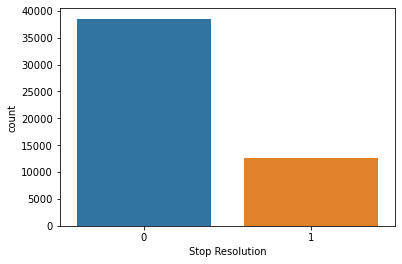

In [707]:
# Plot to see how many arrests were made
sns.countplot(df['Stop Resolution'])



In [708]:
# Dealing with subject Percieved gender

There were less arrests after the Stop

<AxesSubplot:xlabel='count', ylabel='Weapon Type'>

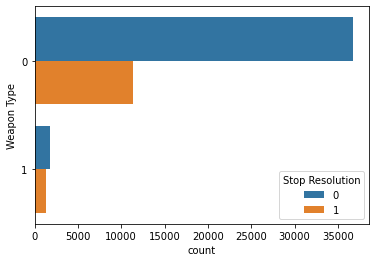

In [709]:
# PLot to see types of weapons the culprits had on them
sns.countplot(y = df['Weapon Type'], hue=df['Stop Resolution'])


There were more arrests of people without any weapon

<AxesSubplot:xlabel='count', ylabel='Subject Perceived Gender'>

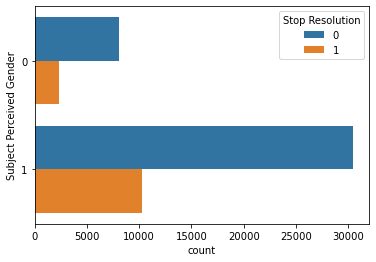

In [710]:
# Plot to see ratio of male to female stopped
sns.countplot(y=df['Subject Perceived Gender'], hue=df['Stop Resolution'])

It is more likely for men to be stopped as compared to ladies. There is also a higher chance of getting arrested if you are a man.

<AxesSubplot:xlabel='count', ylabel='Frisk Flag'>

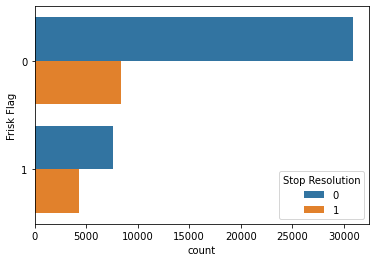

In [711]:
# Plot Frisk Flag vs Stop Resolution
sns.countplot(y=df['Frisk Flag'], hue=df['Stop Resolution'])

<AxesSubplot:xlabel='count', ylabel='Arrest Flag'>

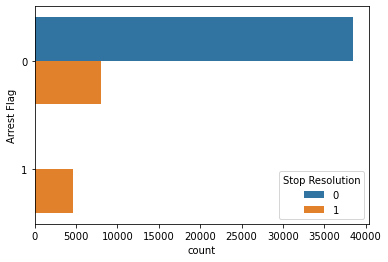

In [712]:
# Plot Arrest Flag vs Stop Resolution
sns.countplot(y=df['Arrest Flag'], hue=df['Stop Resolution'])

The is always going to be an arrest later after the Terry stop rather than immediately on the stop

<AxesSubplot:xlabel='count', ylabel='Year'>

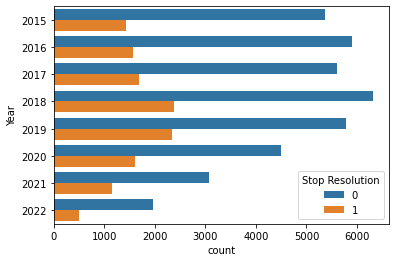

In [713]:
# Plot Year vs Stop Resolution
sns.countplot(y=df['Year'], hue=df['Stop Resolution'])

<AxesSubplot:xlabel='count', ylabel='Month'>

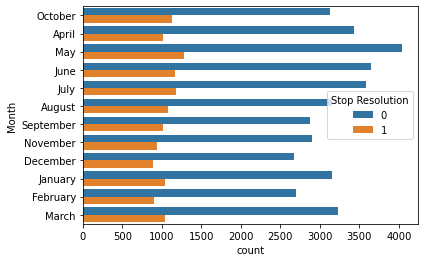

In [714]:
# Plot Month vs Stop Resolution
sns.countplot(y=df['Month'], hue=df['Stop Resolution'])

# 4. Modeling

In this section, we will fit 3 models, a baseline model parametric (logistic Regression) , a non-parametric model that is no hyperparameter tuning, and finally the same non-parametric model with hyperparameter tuning

In [715]:
# Define X and Y 
X = df.drop(columns=['Stop Resolution'], axis=1)
y = df['Stop Resolution']

# Split into Train and Test Data

# We will use 70% of the data as train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

## Logistic Regression 

We will first use a baseline Model, in this case the Logistic Regression Model, to have a comparison point for the other models. 

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51178 entries, 0 to 52327
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stop Resolution           51178 non-null  int64  
 1   Weapon Type               51178 non-null  int64  
 2   Officer Gender            51178 non-null  int64  
 3   Officer Race              51172 non-null  float64
 4   Subject Perceived Race    46427 non-null  float64
 5   Subject Perceived Gender  51178 non-null  int64  
 6   Arrest Flag               51178 non-null  int64  
 7   Frisk Flag                51178 non-null  int64  
 8   Month                     51178 non-null  object 
 9   Year                      51178 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.8+ MB


Fixing the iteration error we will encounter when fitting the logistic regression model

In [729]:
# Fitting the model
logit = LogisticRegression(max_iter = 1000)
logit.fit(X_train_ohe, y_train)
y_train_pred = logit.predict(X_train_ohe)
y_test_pred = logit.predict(X_test_ohe)

### Performance Metrics

In [722]:
accuracy_score(y_train, y_train_pred)

0.8428427869584636

In [725]:
precision_score(y_train, y_train_pred)

0.906785980611484

In [726]:
f1_score(y_train, y_train_pred)

0.5644437567693021

In [732]:
# Determine optimal parameters:
# Declare a baseline classifier:
dtree = DecisionTreeClassifier()

# Create a parameter grid and grid search to identify the best parameters:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10)
}
gs_tree = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# Fit the tuned parameters:
gs_tree.fit(X_train_ohe, y_train)

# Print best estimator parameters:
print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
